In [191]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns

In [192]:
# Reading the data
df = pd.read_csv('adult.csv')

In [193]:
df.head()

Age          Workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

         maritalstatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hourspw   nativecountry  target  
0          2174             0       40   United-States   <=50K  
1             0             0       13   United-States   <=50K  
2             0             0       40   United-States   <=50K  
3             0             0       40   United-States   <=50K  
4             0             0       40            Cuba   <=50K

In [194]:
#Checking for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32561 non-null  int64 
 1   Workclass      32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   education-num  32561 non-null  int64 
 5   maritalstatus  32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capital-gain   32561 non-null  int64 
 11  capital-loss   32561 non-null  int64 
 12  hourspw        32561 non-null  int64 
 13  nativecountry  32561 non-null  object
 14  target         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We do not have any null values!

In [195]:
#description of numerical variales
df.describe().transpose()

count           mean            std      min       25%  \
Age            32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt         32561.0  189778.366512  105549.977697  12285.0  117827.0   
education-num  32561.0      10.080679       2.572720      1.0       9.0   
capital-gain   32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss   32561.0      87.303830     402.960219      0.0       0.0   
hourspw        32561.0      40.437456      12.347429      1.0      40.0   

                    50%       75%        max  
Age                37.0      48.0       90.0  
fnlwgt         178356.0  237051.0  1484705.0  
education-num      10.0      12.0       16.0  
capital-gain        0.0       0.0    99999.0  
capital-loss        0.0       0.0     4356.0  
hourspw            40.0      45.0       99.0

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'target')

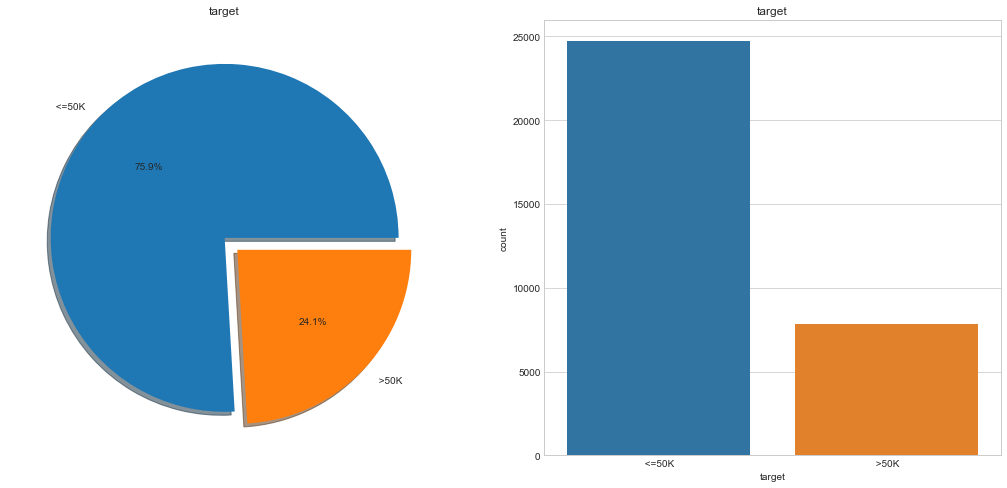

In [196]:
#Plotting target distribution
f,ax=plt.subplots(1,2,figsize=(18,8))
df['target'].value_counts().plot.pie(ax = ax[0], explode=[0,0.1],autopct='%1.1f%%',shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=df,ax=ax[1])
ax[1].set_title('target')

Overall 24.1 % people have a higher income than 50K

### EDA and Feature Generation

In [197]:
#Checking the Columns or features
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'education', 'education-num',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hourspw', 'nativecountry', 'target'],
      dtype='object')

In [198]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print(categorical)

['Workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'nativecountry', 'target']


In [199]:
# Find numerical variables

numerical = [var for var in df.columns if df[var].dtype !='O']
print(numerical)

['Age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hourspw']


In [200]:
# We check for values with '?'

for i in categorical:
    for j in df[i].value_counts().index:
        if j == ' ?':
            print(i)
            break

Workclass
occupation
nativecountry


In [201]:
#Unique classes in Workclass
df['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [202]:
# Number of data points per unique value
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

We see that there are 1836 '?' values, that are corrupt and should be treated.

In [203]:
#Replacing '?' with NaN values
df['Workclass'].replace(' ?', np.NaN, inplace= True)

In [204]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

#### Checking Occupation Variable

In [205]:
# Repeating the same process with Occupation
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [206]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Again we see that there are 1843 '?' counts

In [207]:
df['occupation'].replace(' ?', np.NaN, inplace=True)

In [208]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

#### Checking native country

In [209]:
# Repeating the same process with Native Country
df['nativecountry'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [210]:
df['nativecountry'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [211]:
df['nativecountry'].replace(' ?', np.NaN, inplace=True)

In [212]:
for i in categorical:
    for j in df[i].value_counts().index:
        if j == ' ?':
            print(i)
            break

After careful observation, we donot observe any '?' in any other features

In [213]:
df[categorical].isnull().sum()

Workclass        1836
education           0
maritalstatus       0
occupation       1843
relationship        0
race                0
sex                 0
nativecountry     583
target              0
dtype: int64

## EDA

<AxesSubplot:xlabel='Workclass', ylabel='count'>

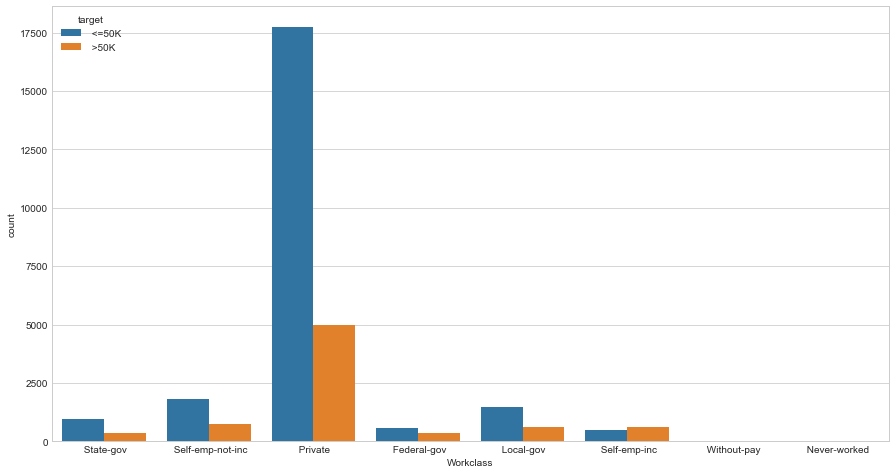

In [214]:
# Creating countplot for categorical variables with hue as target
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='Workclass',data=df,hue='target', ax = ax)

<AxesSubplot:xlabel='education', ylabel='count'>

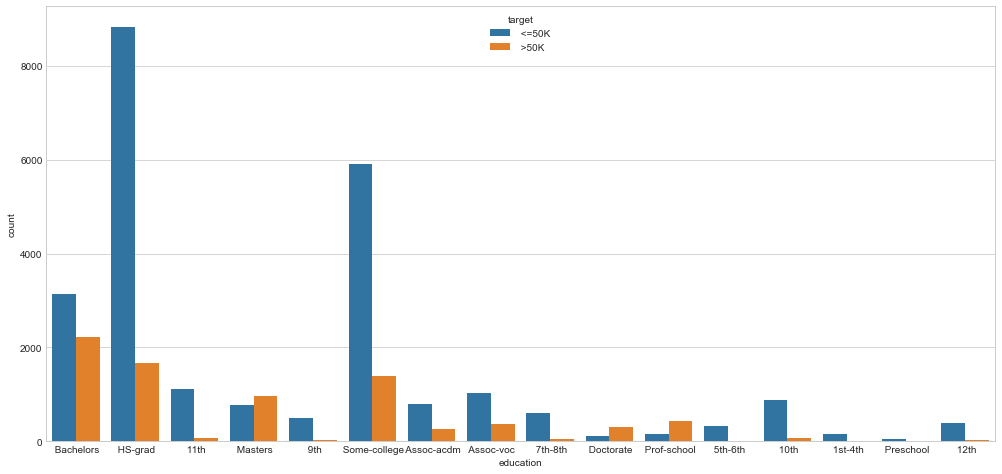

In [215]:
f,ax=plt.subplots(1,1,figsize=(17,8))
sns.countplot(x='education',data=df,hue='target', ax = ax)

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

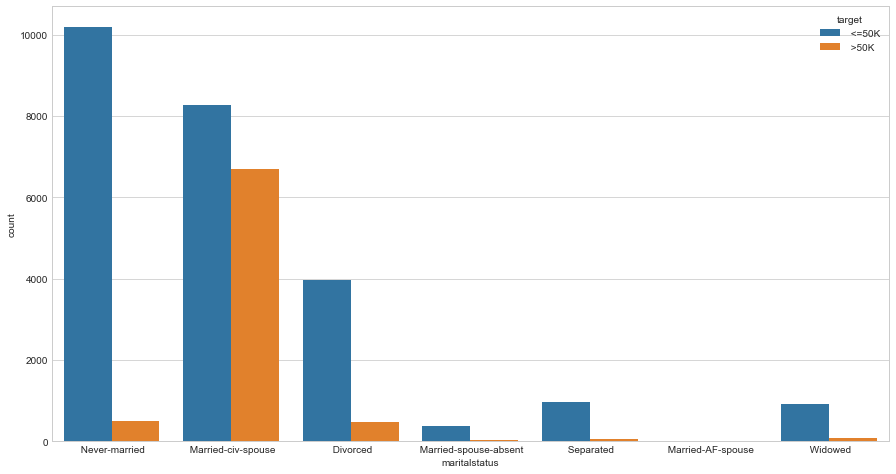

In [216]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='maritalstatus',data=df,hue='target', ax = ax)

<AxesSubplot:xlabel='occupation', ylabel='count'>

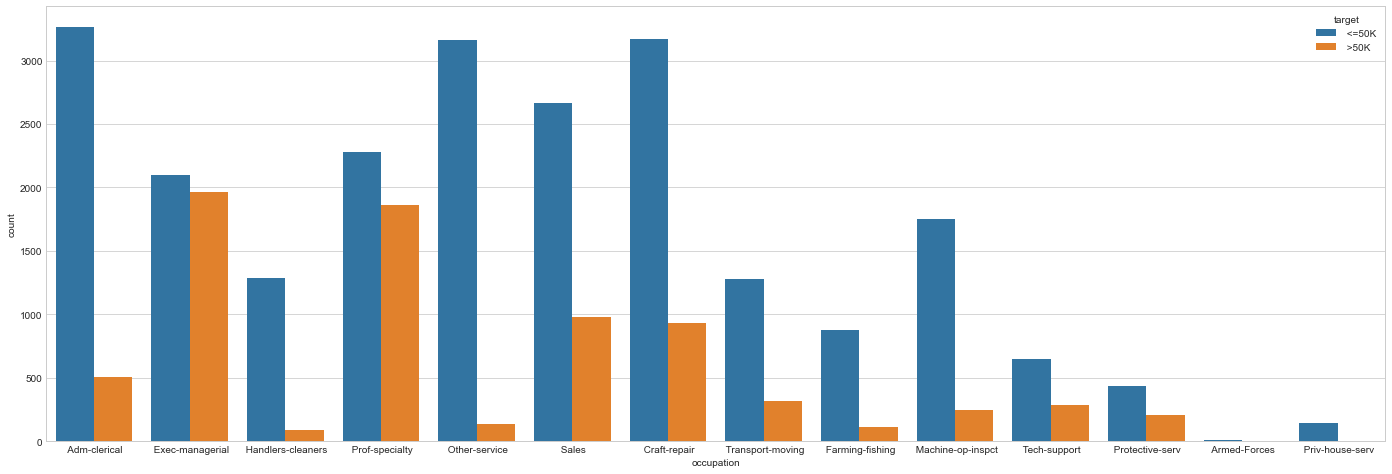

In [217]:
f,ax=plt.subplots(1,1,figsize=(24,8))
sns.countplot(x='occupation',data=df,hue='target', ax = ax)

<AxesSubplot:xlabel='relationship', ylabel='count'>

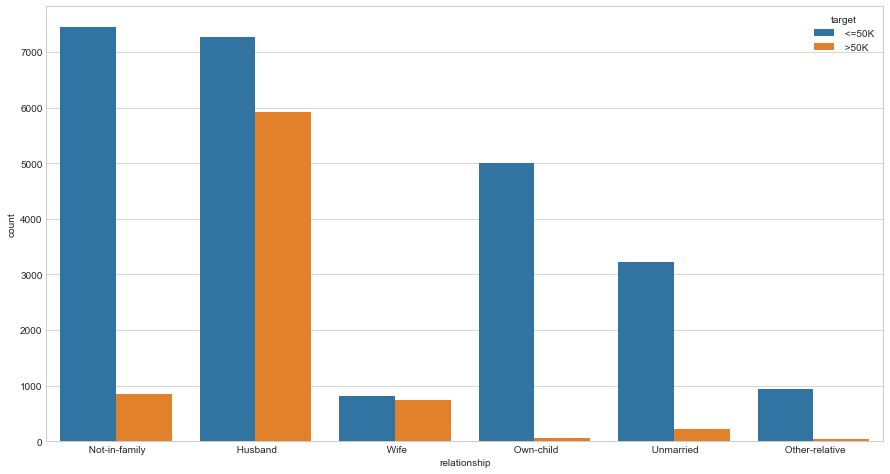

In [218]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='relationship',data=df,hue='target', ax = ax)

<AxesSubplot:xlabel='race', ylabel='count'>

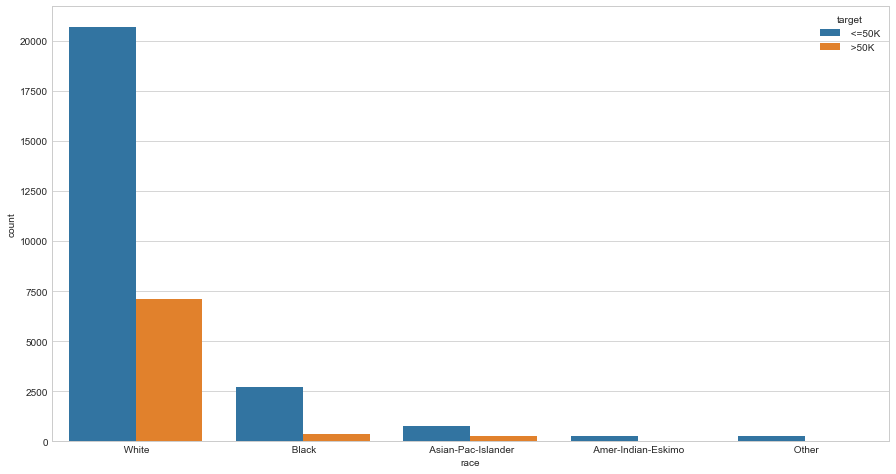

In [219]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='race',data=df,hue='target', ax = ax)

<AxesSubplot:xlabel='sex', ylabel='count'>

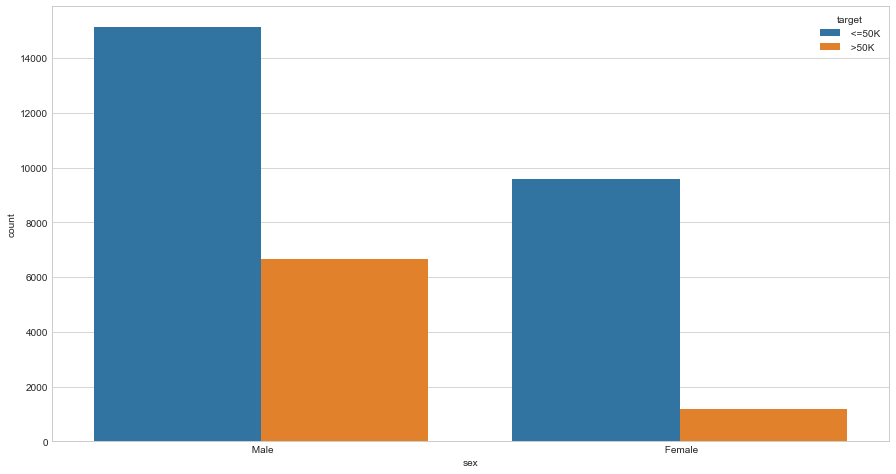

In [220]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='sex',data=df,hue='target', ax = ax)

(2,)


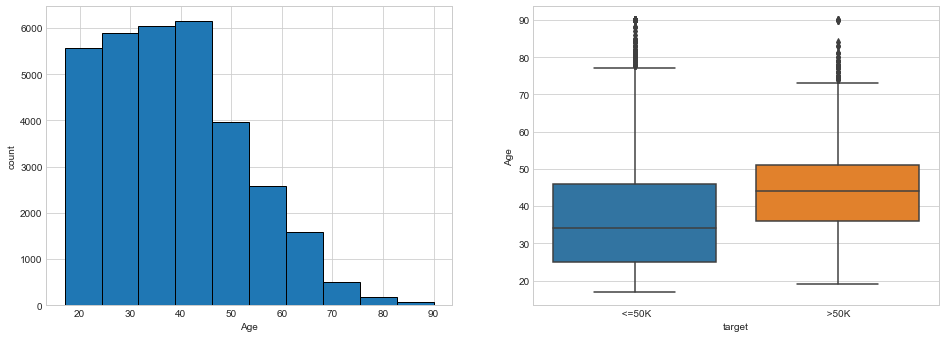

In [221]:
# Creating histograms and boxplot for numerical variables
f,ax=plt.subplots(1,2,figsize=(16,5.5))
print(ax.shape)
ax[0].hist(df.Age, edgecolor="black")
ax[0].set_xlabel('Age')
ax[0].set_ylabel('count')
sns.boxplot(x='target', y='Age', data=df, ax=ax[1])
plt.show()

In [222]:
df.describe()

Age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

            hourspw  
count  32561.000000  
mean      40.437456  
std       12.347429  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000

In [223]:
# Creating a new variable isChild for age less than 24
df['ischild'] = 0
df['ischild'][df['Age'] < 24] = 1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='ischild', ylabel='count'>

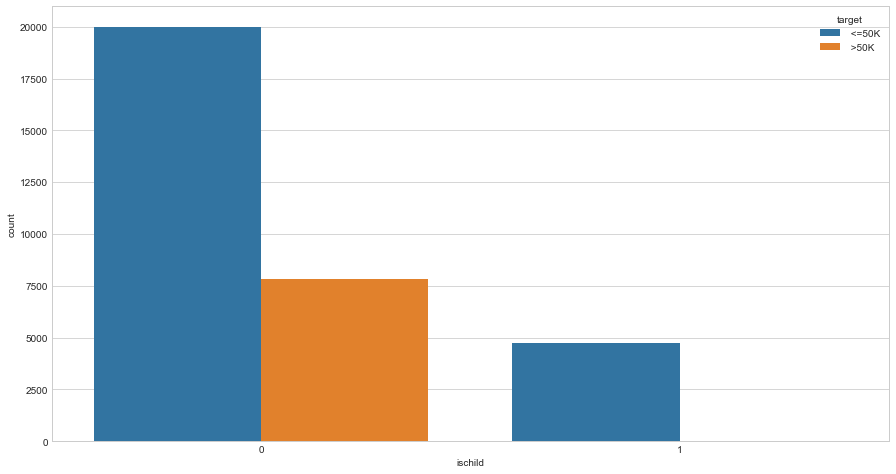

In [224]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='ischild',data=df,hue='target', ax = ax)

In [225]:
# Creating a new variable seniorcitizen for age more than 50
df['seniorcitizen'] = 0
df['seniorcitizen'][df['Age'] > 50] = 1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='seniorcitizen', ylabel='count'>

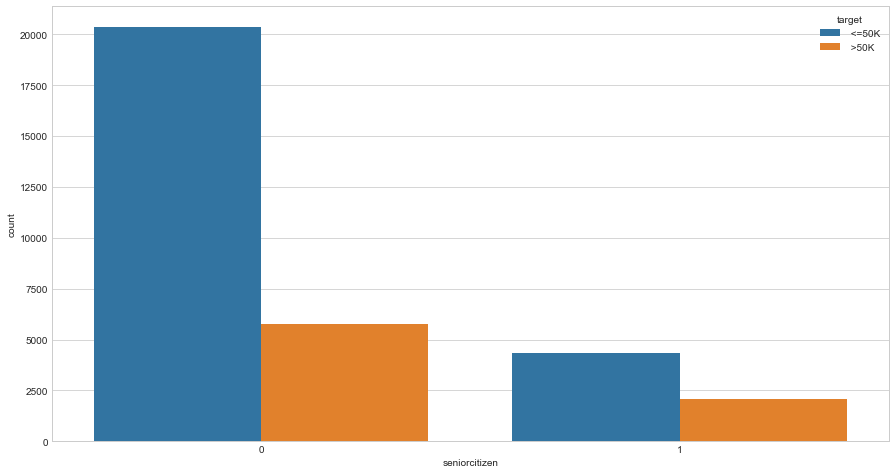

In [226]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='seniorcitizen',data=df,hue='target', ax = ax)

(2,)


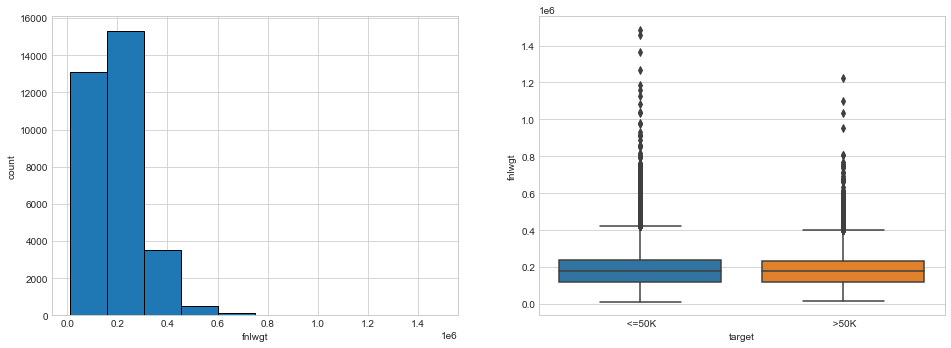

In [227]:
f,ax=plt.subplots(1,2,figsize=(16,5.5))
print(ax.shape)
ax[0].hist(df.fnlwgt, edgecolor="black")
ax[0].set_xlabel('fnlwgt')
ax[0].set_ylabel('count')
sns.boxplot(x='target', y='fnlwgt', data=df, ax=ax[1])
plt.show()

In [228]:
df['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

(2,)


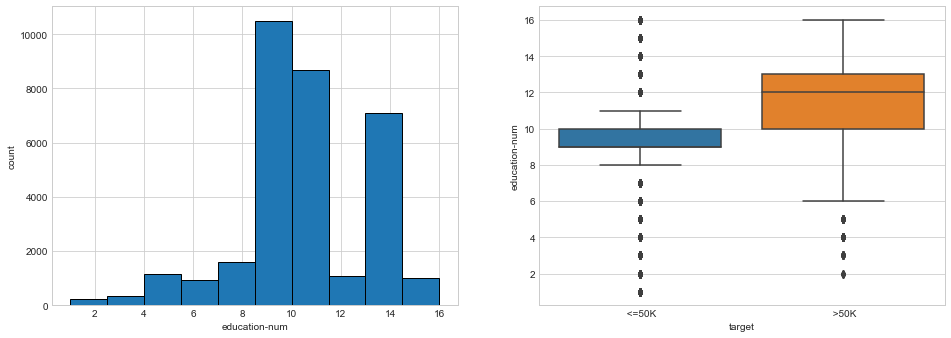

In [229]:
f,ax=plt.subplots(1,2,figsize=(16,5.5))
print(ax.shape)
ax[0].hist(df['education-num'], edgecolor="black")
ax[0].set_xlabel('education-num')
ax[0].set_ylabel('count')
sns.boxplot(x='target', y='education-num', data=df, ax=ax[1])
plt.show()

In [230]:
df['highly_edu'] = 0
df['highly_edu'][df['education-num'] > 10] = 1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='highly_edu', ylabel='count'>

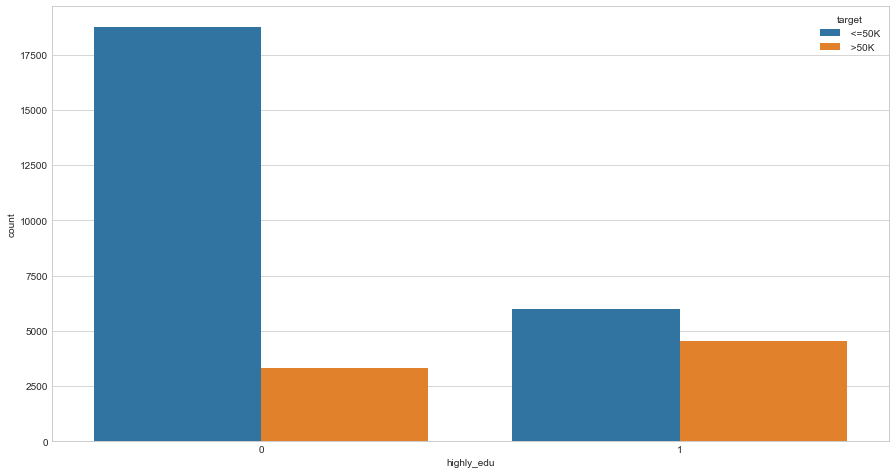

In [231]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='highly_edu',data=df,hue='target', ax = ax)

(2,)


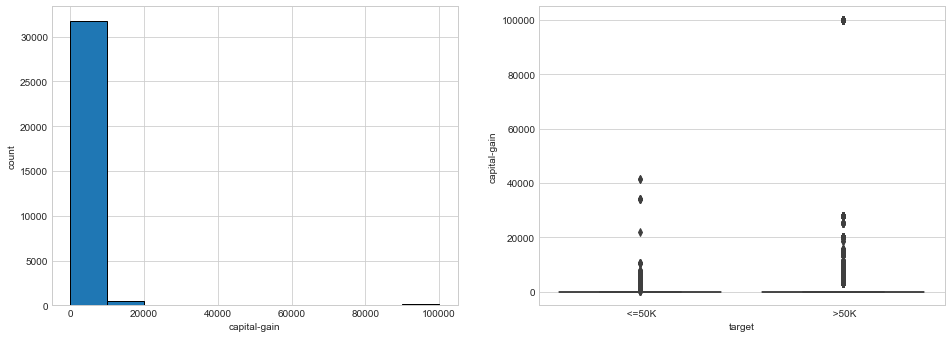

In [232]:
f,ax=plt.subplots(1,2,figsize=(16,5.5))
print(ax.shape)
ax[0].hist(df['capital-gain'], edgecolor="black")
ax[0].set_xlabel('capital-gain')
ax[0].set_ylabel('count')
sns.boxplot(x='target', y='capital-gain', data=df, ax=ax[1])
plt.show()

(2,)


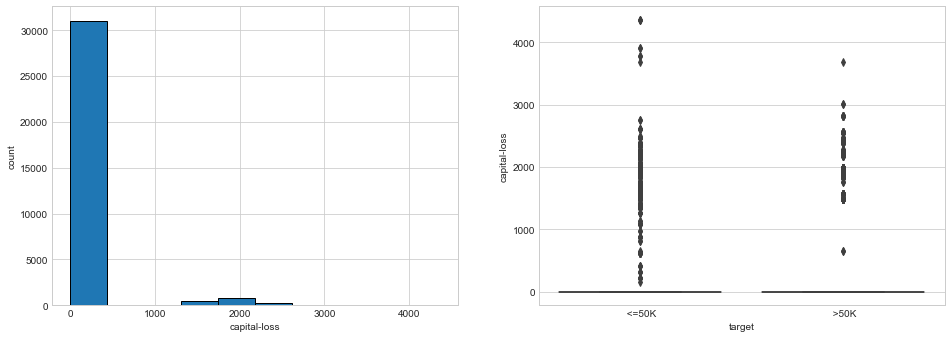

In [233]:
f,ax=plt.subplots(1,2,figsize=(16,5.5))
print(ax.shape)
ax[0].hist(df['capital-loss'], edgecolor="black")
ax[0].set_xlabel('capital-loss')
ax[0].set_ylabel('count')
sns.boxplot(x='target', y='capital-loss', data=df, ax=ax[1])
plt.show()

(2,)


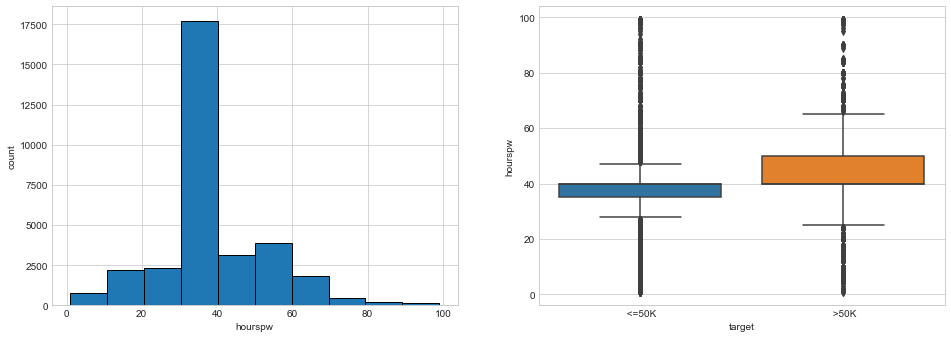

In [234]:
f,ax=plt.subplots(1,2,figsize=(16,5.5))
print(ax.shape)
ax[0].hist(df['hourspw'], edgecolor="black")
ax[0].set_xlabel('hourspw')
ax[0].set_ylabel('count')
sns.boxplot(x='target', y='hourspw', data=df, ax=ax[1])
plt.show()

In [235]:
df['work_more'] = 0
df['work_more'][df['hourspw'] >= 40] = 1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='work_more', ylabel='count'>

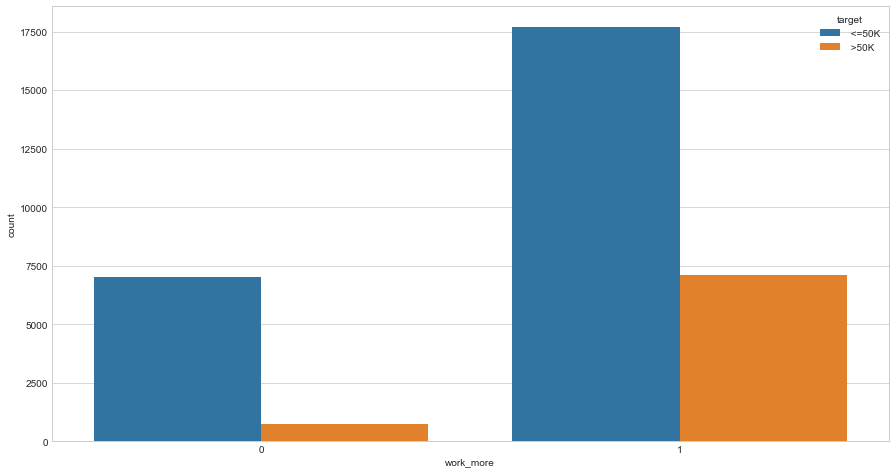

In [236]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='work_more',data=df,hue='target', ax = ax)

### Handling Missing values

In [237]:
# print percentage of missing values in the categorical variables in training set

df[categorical].isnull().mean()

Workclass        0.056386
education        0.000000
maritalstatus    0.000000
occupation       0.056601
relationship     0.000000
race             0.000000
sex              0.000000
nativecountry    0.017905
target           0.000000
dtype: float64

In [238]:
# imputing the missing values with the modes of each feature
df['Workclass'].fillna(df['Workclass'].mode()[0], inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace = True)
df['nativecountry'].fillna(df['nativecountry'].mode()[0], inplace = True)

In [239]:
# print percentage of missing values in the categorical variables in training set

df[categorical].isnull().mean()

Workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
nativecountry    0.0
target           0.0
dtype: float64

### Encoding the categorical variables

In [256]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print(categorical)

['Workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'nativecountry', 'target', 'Occupa_cat', 'Race_cat']


In [257]:
# Find numerical variables

numerical = [var for var in df.columns if df[var].dtype !='O']
print(numerical)

['Age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hourspw', 'ischild', 'seniorcitizen', 'highly_edu', 'work_more', 'education-numCat', 'hourspwCat']


In [258]:
categorical

['Workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'nativecountry',
 'target',
 'Occupa_cat',
 'Race_cat']

In [259]:
df.head()

Age          Workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

         maritalstatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   ...   nativecountry  target  ischild seniorcitizen highly_edu  work_more  \
0  ...   United-States   <=50K        0             0          1          1   
1  ...   United-States   <=50K        0             0          1          0   
2  ...   United-States   <=50K        0             0          0          1   
3  ...   United-States   <=50K        0             1          0          1   
4  ...            Cuba   <=50K        0             0          1          1   

   education-numCat  hourspwCat  Occupa_cat Race_cat  
0              High      Medium    Lowskill    White  
1              High         Low   Highskill    White  
2            Medium      Medium    Lowskill    White  
3            Medium      Medium    Lowskill    Other  
4              High      Medium   Highskill    Other  

[5 rows x 23 columns]

In [260]:
# import category encoders

import category_encoders as ce
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['Workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'nativecountry',
 'Occupa_cat',
 'Race_cat', 'education-numCat', "hourspwCat"])

df = encoder.fit_transform(df)

## Modelling the Naive Bayes Classifier

In [265]:
df.head()

Age  Workclass_1  Workclass_2  Workclass_3  Workclass_4  Workclass_5  \
0   39            1            0            0            0            0   
1   50            0            1            0            0            0   
2   38            0            0            1            0            0   
3   53            0            0            1            0            0   
4   28            0            0            1            0            0   

   Workclass_6  Workclass_7  Workclass_8  fnlwgt  ...  education-numCat_2  \
0            0            0            0   77516  ...                   0   
1            0            0            0   83311  ...                   0   
2            0            0            0  215646  ...                   1   
3            0            0            0  234721  ...                   1   
4            0            0            0  338409  ...                   0   

   education-numCat_3  hourspwCat_1  hourspwCat_2  hourspwCat_3  hourspwCat_4  \
0                   1             0             1             0             0   
1                   1             1             0             0             0   
2                   0             0             1             0             0   
3                   0             0             1             0             0   
4                   1             0             1             0             0   

   Occupa_cat_1  Occupa_cat_2  Race_cat_1  Race_cat_2  
0             1             0           1           0  
1             0             1           1           0  
2             1             0           1           0  
3             1             0           0           1  
4             0             1           0           1  

[5 rows x 121 columns]

In [266]:
#importing Gaussian Naive Bayes, Accuracy score and train test split from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = GaussianNB()

In [274]:
# Splitting data into test train, using a 0.3 split 
X = df2.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KeyError: "['target'] not found in axis"

In [268]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 120), (9769, 120))

In [269]:
#Scaling the training and test feature values

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [270]:
# Using Random Search method to find the best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
gnb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
CV_rfc = RandomizedSearchCV(estimator=gnb, param_distributions=param_grid, cv= 5,random_state=1)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'var_smoothing': 3.5111917342151273e-09}


In [271]:
#Defining the model with tuned hyperparameters
model = GaussianNB(var_smoothing=CV_rfc.best_params_['var_smoothing'])

In [272]:
# Fitting the model on to the train set
model.fit(X_train,y_train)

GaussianNB(var_smoothing=3.5111917342151273e-09)

In [273]:
predict_train = model.predict(X_train)

# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.8229203229203229
accuracy_score on test dataset :  0.8257754120176067


We see that the accuracy values for test and train are close, and thus no overfitting!

### Confusion Matrix

[[6604  851]
 [ 832 1482]]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


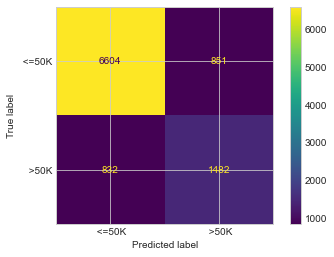

In [73]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, predict_test)
print(cm)

plot_confusion_matrix(model, X_test, y_test) 

In [74]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  6604

True Negatives(TN) =  1482

False Positives(FP) =  851

False Negatives(FN) =  832


### Classification Report

In [75]:
#Prinitng the classification report using the sklearn metrics library
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

       <=50K       0.89      0.89      0.89      7455
        >50K       0.64      0.64      0.64      2314

    accuracy                           0.83      9769
   macro avg       0.76      0.76      0.76      9769
weighted avg       0.83      0.83      0.83      9769



### ROC - AUC

In [76]:
#Getting predicted probabilities
pred_proba = model.predict_proba(X_test)[:, 1]

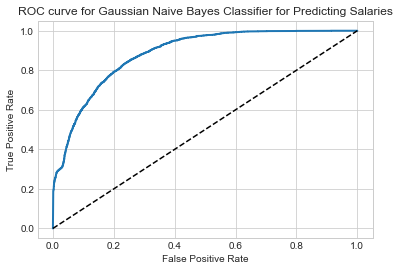

In [77]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_proba, pos_label = ' >50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [78]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, pred_proba)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8843


As our ROC AUC value is close to 1, we can say that our classifer model is working well !

### k-Fold Cross Validation

In [79]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

print('Cross-validation mean accuracy:{}'.format(scores.mean()))

Cross-validation scores:[0.82894737 0.82763158 0.83369899 0.81175954 0.82009653 0.83677051
 0.82185169 0.82755595 0.81614743 0.83238262]
Cross-validation mean accuracy:0.8256842220733931


We see that the mean accuracy is close to the original one, and also there is not much deviation from the average for all the folds, thus we can say our model is not much reliant on the data on which it is being trained.

### Using different threshold values

In [80]:
#Transforming the test set in 0 and 1
y_testing = np.zeros(y_test.shape)
y_testing[y_test == ' >50K'] = 1

In [81]:
#Computing accuracy for different thresholds and finding the best one.
from sklearn.metrics import accuracy_score, f1_score

thresholds = np.arange(0, 100)/100
best_thres = 0
best_score = 0
for thresh in thresholds:
    oofs_rounded = (pred_proba > thresh) * 1
    thresh_score = accuracy_score(y_testing, oofs_rounded)
    if thresh_score > best_score:
        best_score = thresh_score
        best_thres = thresh
print(f'Threshold {best_thres}: {best_score}')

Threshold 0.8: 0.8355000511823114


Thus using 0.8 as thershold and predicting salary to be >50K for probability greater than 0.8 gives us the best accuracy score of 0.835

# Updates

In [243]:
df.head()

Age          Workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

         maritalstatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hourspw   nativecountry  target  ischild  \
0          2174             0       40   United-States   <=50K        0   
1             0             0       13   United-States   <=50K        0   
2             0             0       40   United-States   <=50K        0   
3             0             0       40   United-States   <=50K        0   
4             0             0       40            Cuba   <=50K        0   

   seniorcitizen  highly_edu  work_more  
0              0           1          1  
1              0           1          0  
2              0           0          1  
3              1           0          1  
4              0           1          1

In [244]:
df['education-num']

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education-num, Length: 32561, dtype: int64

In [245]:
#data can be train or test
#var name is variable name: should be passed as strings within ('')
# bins is list of numeric values like [0,6,10,11]
# group names is list of groups you want to create in list form
def bin_var(data, var, bins, group_names):
    bin_value = bins
    group = group_names
    data[var+'Cat'] = pd.cut(df[var], bin_value, labels=group)
    
bin_var(df, 'education-num', [0,6,11,16], ['Low', 'Medium', 'High'])

Created a new variable grouping according to education numbers ar high, med or low

In [246]:
bin_var(df, 'hourspw', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])

Classifying the occupation into Highly Skilled and low Skilled

In [247]:
occu=pd.crosstab(df['occupation'],df['target'], margins=True).reset_index()

In [248]:
occu

target          occupation   <=50K   >50K    All
0             Adm-clerical    3263    507   3770
1             Armed-Forces       8      1      9
2             Craft-repair    3170    929   4099
3          Exec-managerial    2098   1968   4066
4          Farming-fishing     879    115    994
5        Handlers-cleaners    1284     86   1370
6        Machine-op-inspct    1752    250   2002
7            Other-service    3158    137   3295
8          Priv-house-serv     148      1    149
9           Prof-specialty    3933   2050   5983
10         Protective-serv     438    211    649
11                   Sales    2667    983   3650
12            Tech-support     645    283    928
13        Transport-moving    1277    320   1597
14                     All   24720   7841  32561

In [249]:
import re
def occup(x):
    if re.search('managerial', x):
        return 'Highskill'
    elif re.search('specialty',x):
        return 'Highskill'
    else:
        return 'Lowskill'

In [250]:
df['Occupa_cat']=df.occupation.apply(lambda x: x.strip()).apply(lambda x: occup(x))

In [251]:
df['Occupa_cat'].value_counts()

Lowskill     22512
Highskill    10049
Name: Occupa_cat, dtype: int64

Race has been binned into White and others

In [252]:
pd.crosstab(df['race'],df['target'], margins=True)

target                <=50K   >50K    All
race                                     
 Amer-Indian-Eskimo     275     36    311
 Asian-Pac-Islander     763    276   1039
 Black                 2737    387   3124
 Other                  246     25    271
 White                20699   7117  27816
All                   24720   7841  32561

In [253]:
df['Race_cat']=df['race'].apply(lambda x: x.strip())
df['Race_cat']=df['Race_cat'].apply(lambda x: 'White' if x=='White' else 'Other')

### Feature Selection Using Variance Threshold

Variance Threshold is a univariate approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples. As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by The below approach removes variable which have more than 80% values are either 0 or 1

In [254]:
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'education', 'education-num',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hourspw', 'nativecountry', 'target',
       'ischild', 'seniorcitizen', 'highly_edu', 'work_more',
       'education-numCat', 'hourspwCat', 'Occupa_cat', 'Race_cat'],
      dtype='object')

In [261]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_select(df, thresh=0.0, na_replacement=-999):
    df1 = df.copy(deep=True) # Make a deep copy of the dataframe
    selector = VarianceThreshold(thresh) # passing Threshold
    selector.fit(df1) # Fill NA values as VarianceThreshold cannot deal with those
    df2 = df.loc[:,selector.get_support(indices=False)] # Get new dataframe with columns deleted that have NA values
    return df2

In [262]:
df2=variance_threshold_select(df.drop('target', axis=1), thresh=.8* (1 - .8))

In [263]:
print(df2.columns)

Index(['Age', 'Workclass_3', 'fnlwgt', 'education_2', 'education_6',
       'education-num', 'maritalstatus_1', 'maritalstatus_2', 'relationship_1',
       'relationship_2', 'sex_1', 'sex_2', 'capital-gain', 'capital-loss',
       'hourspw', 'highly_edu', 'work_more', 'education-numCat_2',
       'education-numCat_3', 'hourspwCat_1', 'hourspwCat_2', 'hourspwCat_3',
       'Occupa_cat_1', 'Occupa_cat_2'],
      dtype='object')


In [264]:
len(df2.columns)

24

As you can see below the number of columns have been reduced to 24 because of the the variance threshold. The removed columns have the same value in 80% of the observations